## Load drive and data

## Import lib



## Filter out corrupted images

## **Tạo và tải dataset cho mô hình phân loại ảnh**

### Giải thích ngắn gọn:
Đoạn mã trên thực hiện các bước sau:
1. **Xác định đường dẫn dataset**: `dataset_path` lưu đường dẫn đến thư mục chứa dữ liệu về các loại chuối.
2. **Thiết lập kích thước ảnh và batch size**: Các ảnh đầu vào được thay đổi kích thước về `(180, 180)` và chia thành các batch 16 ảnh.
3. **Tạo các tập dữ liệu**:
   - **Tập huấn luyện (`train_ds`)**: Được tạo từ thư mục `/train`, chứa ảnh dùng để huấn luyện mô hình.
   - **Tập kiểm tra (`val_ds`)**: Được tạo từ thư mục `/valid`, dùng để đánh giá hiệu quả mô hình trong quá trình huấn luyện.
   - **Tập kiểm thử (`test_ds`)**: Được tạo từ thư mục `/test`, dùng để kiểm tra mô hình sau khi huấn luyện.
4. **In ra thông tin về số lượng batch trong các tập**: Mã in ra số lượng batch trong mỗi tập dữ liệu huấn luyện, kiểm thử và kiểm tra.



In [19]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# Đường dẫn đến thư mục dataset
dataset_path = "E:/banana_classification"

# Kích thước ảnh và batch size
image_size = (224, 224)
batch_size = 32

# Định nghĩa các phép biến đổi ảnh (resize và normalize)
transform = transforms.Compose([
    transforms.Resize(image_size),  # Thay đổi kích thước ảnh
    transforms.ToTensor(),  # Chuyển đổi ảnh thành tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Chuẩn hóa giá trị pixel
])

# Tạo tập huấn luyện và kiểm tra từ thư mục
train_ds = datasets.ImageFolder(root=os.path.join(dataset_path, 'train'), transform=transform)
val_ds = datasets.ImageFolder(root=os.path.join(dataset_path, 'valid'), transform=transform)
test_ds = datasets.ImageFolder(root=os.path.join(dataset_path, 'test'), transform=transform)

# Tạo DataLoader cho từng tập dữ liệu
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

# Kiểm tra kích thước dataset
print(f"Train dataset size: {len(train_ds)} samples, {len(train_loader)} batches")
print(f"Validation dataset size: {len(val_ds)} samples, {len(val_loader)} batches")
print(f"Test dataset size: {len(test_ds)} samples, {len(test_loader)} batches")

# In một batch dữ liệu từ train_loader và val_loader
data_iter = iter(train_loader)
images, labels = next(data_iter)
print(f"Train Batch - Image Shape: {images.shape}, Labels Shape: {labels.shape}")

data_iter = iter(val_loader)
images, labels = next(data_iter)
print(f"Validation Batch - Image Shape: {images.shape}, Labels Shape: {labels.shape}")


Looking in indexes: https://download.pytorch.org/whl/cu121
Using device: cuda
Train dataset size: 7773 samples, 243 batches
Validation dataset size: 735 samples, 23 batches
Test dataset size: 377 samples, 12 batches
Train Batch - Image Shape: torch.Size([32, 3, 224, 224]), Labels Shape: torch.Size([32])
Validation Batch - Image Shape: torch.Size([32, 3, 224, 224]), Labels Shape: torch.Size([32])


##  Visualize the data
Chi Don gian la hien ra 9 image de check xem data co loi k
==> Khong anh huong den viec training



4 classes : ['overripe'->0, 'ripe'->1, 'rotten'->2, 'unripe'->3]

### Giải thích label
**`label_mode="categorical"`** trong `keras.utils.image_dataset_from_directory` chỉ định cách thức mã hóa nhãn (labels) của các ảnh trong dataset. Cụ thể, khi sử dụng **`label_mode="categorical"`**, nhãn của mỗi ảnh sẽ được mã hóa dưới dạng **one-hot encoding**.

### Giải thích về One-Hot Encoding:

One-hot encoding là một cách mã hóa nhãn trong các bài toán phân loại nhiều lớp. Đối với mỗi lớp trong dataset, ta sẽ tạo một vector trong đó chỉ có một phần tử có giá trị là 1, còn lại tất cả các phần tử khác có giá trị là 0.

### Ví dụ:
Giả sử bạn có một dataset với 3 lớp: `ripe`, `unripe`, và `green`. Khi sử dụng `label_mode="categorical"`, mỗi nhãn sẽ được mã hóa như sau:

- **Lớp `ripe`** sẽ được mã hóa thành `[1, 0, 0]`
- **Lớp `unripe`** sẽ được mã hóa thành `[0, 1, 0]`
- **Lớp `green`** sẽ được mã hóa thành `[0, 0, 1]`

### Cách thức hoạt động:
1. **Dataset có 3 lớp**: Nếu bạn có 3 lớp (ví dụ, `ripe`, `unripe`, `green`), thì mô hình sẽ phân loại mỗi ảnh vào một trong ba lớp này.
2. **One-hot Encoding**: Nhãn của mỗi ảnh sẽ được biểu diễn dưới dạng một vector 3 chiều, trong đó chỉ số lớp của ảnh là `1` và tất cả các chỉ số lớp còn lại là `0`.

### Ví dụ cụ thể:
Giả sử bạn có một dataset với các thư mục sau:
```
/train
    /ripe
        banana1.jpg
        banana2.jpg
    /unripe
        banana3.jpg
        banana4.jpg
    /green
        banana5.jpg
        banana6.jpg
```
Khi gọi hàm:
```python
train_ds = keras.utils.image_dataset_from_directory(
    '/train',
    label_mode='categorical'
)
```
- Ảnh trong thư mục `ripe` sẽ được gán nhãn `[1, 0, 0]` (vì `ripe` là lớp đầu tiên).
- Ảnh trong thư mục `unripe` sẽ được gán nhãn `[0, 1, 0]`.
- Ảnh trong thư mục `green` sẽ được gán nhãn `[0, 0, 1]`.

### Tại sao sử dụng One-Hot Encoding:
- **Phân loại đa lớp**: One-hot encoding giúp mô hình học cách phân biệt từng lớp dựa trên sự khác biệt giữa các lớp.
- **Dễ dàng với hàm mất mát**: Khi sử dụng một số hàm mất mát (loss function) như **categorical crossentropy**, one-hot encoding giúp tính toán độ lỗi giữa nhãn dự đoán và nhãn thật dễ dàng hơn.

### Tóm lại:
Khi bạn sử dụng `label_mode="categorical"`, các nhãn của dataset sẽ được mã hóa dưới dạng one-hot encoding, giúp mô hình có thể phân loại chính xác các ảnh vào các lớp khác nhau trong bài toán phân loại đa lớp.

['overripe', 'ripe', 'unripe']


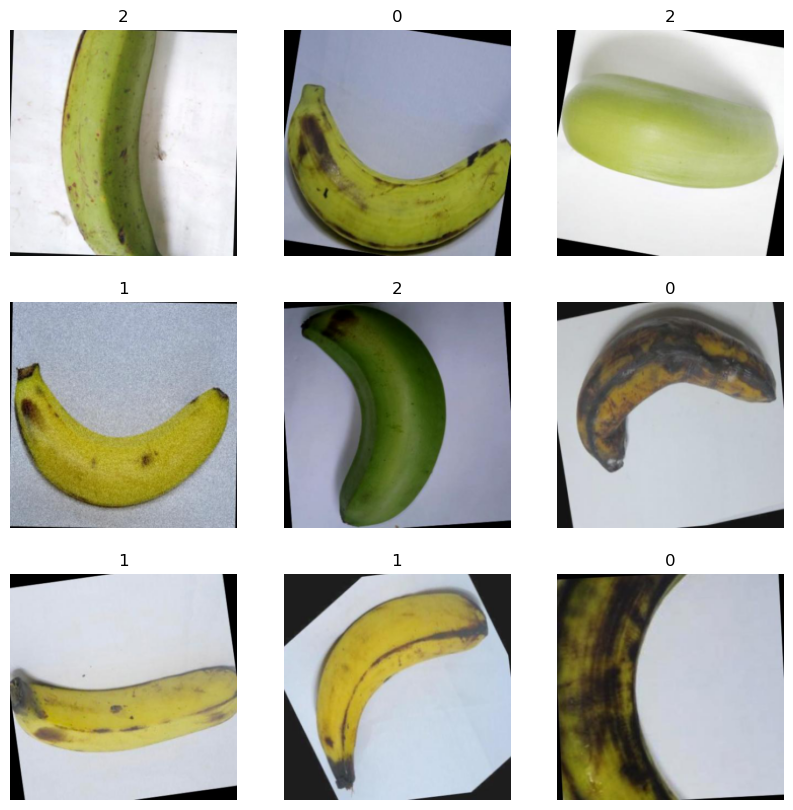

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Hiển thị 9 ảnh từ dataset
plt.figure(figsize=(10, 10))

# Lấy 1 batch đầu tiên từ train_loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

for i in range(9):  # Lặp qua 9 ảnh đầu tiên
    ax = plt.subplot(3, 3, i + 1)
    # Chuyển tensor ảnh thành numpy array và đưa giá trị về khoảng [0, 255]
    img = images[i].permute(1, 2, 0).numpy() * 0.5 + 0.5  # Đảo thứ tự chiều (C, H, W) -> (H, W, C) và undo normalize
    plt.imshow((img * 255).astype("uint8"))
    plt.title(labels[i].item())  # Lấy nhãn lớp (số nguyên)
    plt.axis("off")

# In tên của các lớp
print(train_ds.classes)


## Using image data augmentation
==> da dang hoa DATASET

In [21]:
# data_augmentation_layers = [
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
# ]

# def data_augmentation(images):
#     for layer in data_augmentation_layers:
#         images = layer(images)
#     return images

### Hiển thị các ảnh sau khi bổ sung dữ liệu:
==> Kết quả cho thấy các biến thể khác nhau của cùng một ảnh, giúp bạn thấy rõ cách mà bổ sung dữ liệu có thể giúp mô hình học được nhiều đặc trưng tổng quát hơn, từ đó cải thiện khả năng xử lý ảnh thực tế.


In [22]:
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#     for i in range(9):
#         augmented_images = data_augmentation(images)
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(np.array(augmented_images[0]).astype("uint8"))
#         plt.axis("off")

# Preprocessing
## Standardizing the data
==> Two options to preprocess the data:
1. Make it part of the model
2. apply it to the dataset ==> ko bt chon gi chon 2
=> This second option (asynchronous preprocessing) is always a solid choice.

In [23]:
from torchvision import transforms

# Định nghĩa lại các phép biến đổi với rescaling ảnh
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Thay đổi kích thước ảnh
    transforms.ToTensor(),  # Chuyển đổi ảnh thành tensor (giá trị trong khoảng [0, 1])
    transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0])  # Không thay đổi giá trị pixel
])

# Áp dụng lại transform vào dataset
train_ds.transform = transform
val_ds.transform = transform
test_ds.transform = transform

# Dataset sau khi được cập nhật sẽ tự động áp dụng preprocessing mỗi khi truy cập ảnh
print("Transform updated for datasets.")


Transform updated for datasets.


## BUILD MODEL
We'll build a small version of the Xception network. We haven't particularly tried to optimize the architecture;
if you want to do a systematic search for the best model configuration, consider using KerasTuner.

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomModel, self).__init__()

        # Entry block
        self.entry_conv = nn.Conv2d(3, 128, kernel_size=3, stride=2, padding=1)
        self.entry_bn = nn.BatchNorm2d(128)
        self.entry_drop = nn.Dropout(0.25)

        # Sequential block for depth separable convolutions
        self.block1 = self._make_block(128, 256)
        self.block2 = self._make_block(256, 512)
        self.block3 = self._make_block(512, 728)

        # Final layers
        self.final_conv = nn.Conv2d(728, 1024, kernel_size=3, padding=1)
        self.final_bn = nn.BatchNorm2d(1024)
        self.final_drop = nn.Dropout(0.25)

        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.output_fc = nn.Linear(1024, num_classes)
        self.final_drop2 = nn.Dropout(0.5)

    def _make_block(self, in_channels, out_channels):
        # A helper function to create the blocks with separable convolutions
        return nn.Sequential(
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, groups=1),  # Equivalent to SeparableConv2D
            nn.BatchNorm2d(out_channels),
            nn.Dropout(0.25),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, groups=1),  # Equivalent to SeparableConv2D
            nn.BatchNorm2d(out_channels),
            nn.Dropout(0.25),
            nn.MaxPool2d(3, stride=2, padding=1),
        )

    def forward(self, x):
        # Entry block
        x = self.entry_conv(x)
        x = self.entry_bn(x)
        x = F.relu(x)
        x = self.entry_drop(x)

        # Residual blocks
        x1 = self.block1(x)
        x2 = self.block2(x1)
        x3 = self.block3(x2)

        # Final convolution and pooling
        x = self.final_conv(x3)
        x = self.final_bn(x)
        x = F.relu(x)
        x = self.final_drop(x)

        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.final_drop2(x)

        # Output layer
        x = self.output_fc(x)
        return F.softmax(x, dim=1)

# Tạo mô hình với num_classes = 4
model = CustomModel(num_classes=4)

# Tóm tắt mô hình
print(model)


CustomModel(
  (entry_conv): Conv2d(3, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (entry_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (entry_drop): Dropout(p=0.25, inplace=False)
  (block1): Sequential(
    (0): ReLU()
    (1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.25, inplace=False)
    (4): ReLU()
    (5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.25, inplace=False)
    (8): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): ReLU()
    (1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

## TRAIN


### Train_ds and val_ds
Tập `val_ds` (validation dataset) được sử dụng trong quá trình huấn luyện mô hình để theo dõi hiệu suất của mô hình trên dữ liệu chưa được huấn luyện, giúp đánh giá khả năng tổng quát của mô hình và tránh overfitting.

Trong mã huấn luyện, bạn đã sử dụng `validation_data=val_ds` để mô hình tính toán độ chính xác và mất mát trên tập xác thực sau mỗi epoch.

### Tóm tắt cách sử dụng:
- **`train_ds`**: Dữ liệu huấn luyện.
- **`val_ds`**: Dữ liệu xác thực, được sử dụng để kiểm tra mô hình trong quá trình huấn luyện.
- Mô hình được huấn luyện qua nhiều epoch, và hiệu suất của mô hình trên tập xác thực sẽ được theo dõi để đảm bảo không bị overfit.

Sau khi huấn luyện, bạn có thể truy cập kết quả từ `history` để kiểm tra độ chính xác và mất mát trên cả tập huấn luyện và tập xác thực.

Using device: cuda
Loading model and optimizer states...


C:\Users\ChuPhu\AppData\Local\Temp\ipykernel_7464\1382641355.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=devic

Checkpoint loaded successfully. Resuming from epoch 20.
Training already completed up to the specified number of epochs.


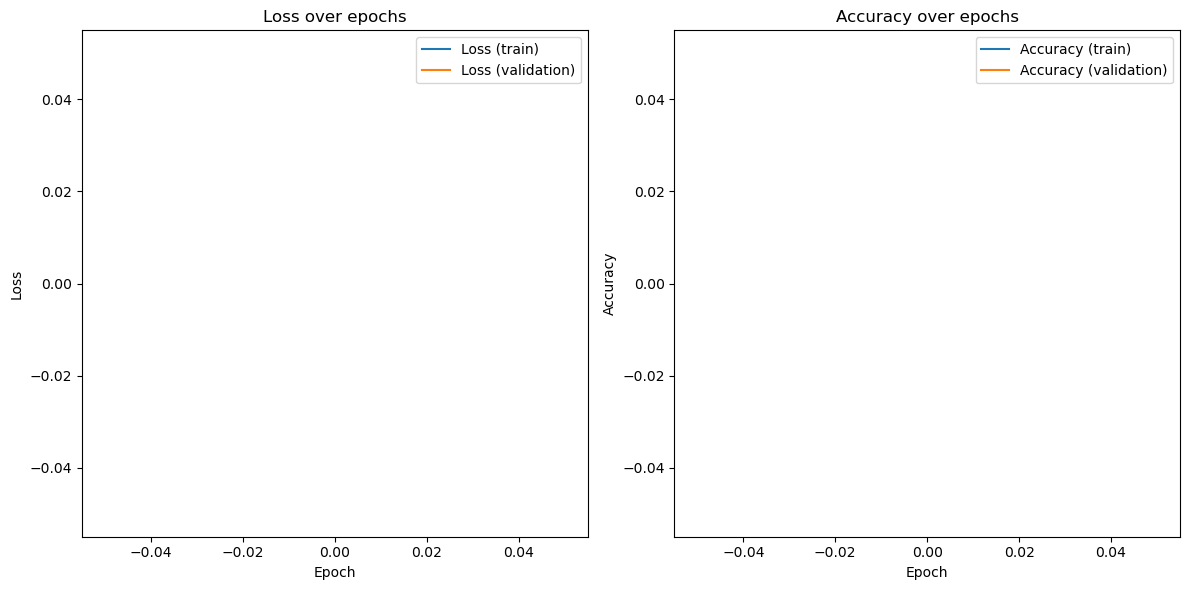

Best model loaded.


C:\Users\ChuPhu\AppData\Local\Temp\ipykernel_7464\1382641355.py:156: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=devi

In [25]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import os

# Kiểm tra và đặt thiết bị
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Khởi tạo mô hình và chuyển sang thiết bị
model = CustomModel(num_classes=4).to(device)

# Khởi tạo optimizer, scheduler và loss function
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
criterion = nn.CrossEntropyLoss()

# Tạo DataLoader từ dataset để huấn luyện
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

# Danh sách lưu lịch sử mất mát và độ chính xác
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Early Stopping variables
best_val_loss = float('inf')
early_stop_counter = 0
patience = 3

# Số epoch mong muốn
total_epochs = 20
start_epoch = 0
checkpoint_path = "best_model.pth"

# Kiểm tra và tải checkpoint nếu có
if os.path.exists(checkpoint_path):
    try:
        print("Loading model and optimizer states...")
        checkpoint = torch.load(checkpoint_path, map_location=device)
        model.load_state_dict(checkpoint.get('model_state_dict', model.state_dict()))
        optimizer.load_state_dict(checkpoint.get('optimizer_state_dict', optimizer.state_dict()))
        scheduler.load_state_dict(checkpoint.get('scheduler_state_dict', scheduler.state_dict()))
        start_epoch = checkpoint.get('last_epoch', 0) + 1
        best_val_loss = checkpoint.get('best_val_loss', float('inf'))
        early_stop_counter = checkpoint.get('early_stop_counter', 0)
        print(f"Checkpoint loaded successfully. Resuming from epoch {start_epoch}.")
    except KeyError as e:
        print(f"Checkpoint loading error: {e}. Starting from scratch.")
        start_epoch = 0
else:
    print("No checkpoint found. Training from scratch.")

if start_epoch >= total_epochs:
    print("Training already completed up to the specified number of epochs.")
else:
    print(f"Resuming training from epoch {start_epoch} to {total_epochs}.")

# Training loop
for epoch in range(start_epoch, total_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_correct / val_total)

    print(f"Epoch [{epoch+1}/{total_epochs}], Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1] * 100:.2f}%")
    print(f"Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracies[-1] * 100:.2f}%")

    # Checkpoint Saving
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'best_val_loss': best_val_loss,
        'last_epoch': epoch,
        'early_stop_counter': early_stop_counter,
    }, checkpoint_path)

    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        early_stop_counter = 0
        print("Checkpoint updated: best model.")
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered! Training stopped.")
            break

    # Update learning rate
    scheduler.step()

# Plot training results
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Loss (train)')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Loss (validation)')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Accuracy (train)')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Accuracy (validation)')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Load the best model
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
print("Best model loaded.")


## Test model

C:\Users\ChuPhu\AppData\Local\Temp\ipykernel_7464\95100910.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("banana_ripeness_model.pth"))

Test loss: 1.3926
Test accuracy: 32.29%


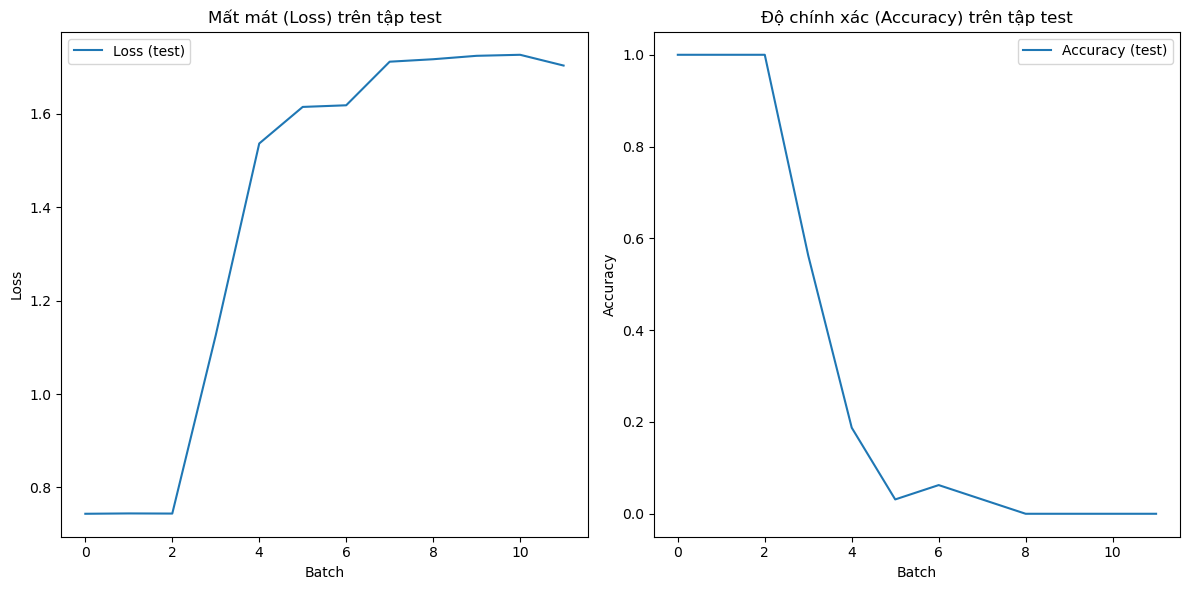

In [26]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt

# Khởi tạo lại mô hình và tải trọng số đã lưu
model = CustomModel(num_classes=4).to(device)
model.load_state_dict(torch.load("banana_ripeness_model.pth"))
model.eval()  # Đặt mô hình ở chế độ kiểm tra

# Tạo DataLoader cho tập test
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)
criterion = nn.CrossEntropyLoss()

# Đánh giá trên tập test
test_losses = []
test_accuracies = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        test_losses.append(loss.item())
        
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == labels).sum().item() / labels.size(0)
        test_accuracies.append(accuracy)

# Tính trung bình loss và accuracy
average_test_loss = sum(test_losses) / len(test_losses)
average_test_accuracy = sum(test_accuracies) / len(test_accuracies)

print(f"Test loss: {average_test_loss:.4f}")
print(f"Test accuracy: {average_test_accuracy * 100:.2f}%")

# Vẽ đồ thị loss và accuracy
plt.figure(figsize=(12, 6))

# Đồ thị mất mát (loss)
plt.subplot(1, 2, 1)
plt.plot(test_losses, label='Loss (test)')
plt.title('Mất mát (Loss) trên tập test')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()

# Đồ thị độ chính xác (accuracy)
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Accuracy (test)')
plt.title('Độ chính xác (Accuracy) trên tập test')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\ChuPhu\AppData\Local\Temp\ipykernel_7464\2423325522.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=devic

Mô hình tốt nhất đã được tải.


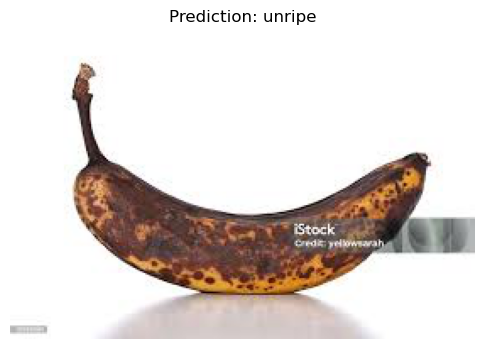

Dự đoán: unripe


In [30]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt

def predict_image(image_path, model, transform, classes, device):
    """
    Dự đoán đầu ra cho một hình ảnh cụ thể và hiển thị hình ảnh cùng kết quả.
    
    Args:
        image_path (str): Đường dẫn đến hình ảnh.
        model (torch.nn.Module): Mô hình đã huấn luyện.
        transform (torchvision.transforms.Compose): Transform áp dụng cho hình ảnh.
        classes (list): Danh sách nhãn lớp.
        device (torch.device): Thiết bị để tính toán (CPU/GPU).
    
    Returns:
        str: Kết quả dự đoán.
    """
    model.eval()
    try:
        # Mở hình ảnh
        image = Image.open(image_path).convert('RGB')
        
        # Áp dụng transform
        input_image = transform(image).unsqueeze(0).to(device)
        
        # Dự đoán với mô hình
        with torch.no_grad():
            output = model(input_image)
            _, predicted = torch.max(output, 1)
            predicted_label = classes[predicted.item()]
        
        # Hiển thị hình ảnh và kết quả dự đoán
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.title(f"Prediction: {predicted_label}")
        plt.axis("off")
        plt.show()
        
        return f"Dự đoán: {predicted_label}"
    except Exception as e:
        return f"Đã xảy ra lỗi khi dự đoán: {e}"

# Định nghĩa các lớp (cập nhật theo số lớp của bạn)
classes = ['overripe', 'ripe', 'unripe']  # Thay thế bằng nhãn thực tế của bạn

# Định nghĩa transform tương tự như khi huấn luyện
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize theo kích thước bạn đã dùng khi train
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Theo chuẩn ImageNet hoặc khác
])

# Load mô hình tốt nhất
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
print("Mô hình tốt nhất đã được tải.")

# Kiểm tra thử nghiệm với một ảnh
test_image_path = "E:/chuoithoi.jpg"  # Thay bằng đường dẫn ảnh của bạn
result = predict_image(test_image_path, model, transform, classes, device)
print(result)


## Lấy trọng số tối ưu và thay vào C++ ==> chưa thực hiện được

In [28]:
def extract_weights_and_biases(model):
    """
    Trích xuất trọng số và bias từ mô hình.
    
    Args:
        model (torch.nn.Module): Mô hình đã huấn luyện.
    
    Returns:
        dict: Trọng số và bias cho từng lớp.
    """
    weights_and_biases = {}
    
    for name, param in model.named_parameters():
        if param.requires_grad:  # Chỉ lấy các tham số có thể học
            if "weight" in name:
                weights_and_biases[f"{name}_weights"] = param.data.cpu().numpy()
            elif "bias" in name:
                weights_and_biases[f"{name}_biases"] = param.data.cpu().numpy()
    
    return weights_and_biases

# Trích xuất trọng số và bias của mô hình hiện tại
weights_and_biases = extract_weights_and_biases(model)

# Lưu kết quả hoặc in ra
for key, value in weights_and_biases.items():
    print(f"{key}: {value.shape}")


entry_conv.weight_weights: (128, 3, 3, 3)
entry_conv.bias_biases: (128,)
entry_bn.weight_weights: (128,)
entry_bn.bias_biases: (128,)
block1.1.weight_weights: (256, 128, 3, 3)
block1.1.bias_biases: (256,)
block1.2.weight_weights: (256,)
block1.2.bias_biases: (256,)
block1.5.weight_weights: (256, 256, 3, 3)
block1.5.bias_biases: (256,)
block1.6.weight_weights: (256,)
block1.6.bias_biases: (256,)
block2.1.weight_weights: (512, 256, 3, 3)
block2.1.bias_biases: (512,)
block2.2.weight_weights: (512,)
block2.2.bias_biases: (512,)
block2.5.weight_weights: (512, 512, 3, 3)
block2.5.bias_biases: (512,)
block2.6.weight_weights: (512,)
block2.6.bias_biases: (512,)
block3.1.weight_weights: (728, 512, 3, 3)
block3.1.bias_biases: (728,)
block3.2.weight_weights: (728,)
block3.2.bias_biases: (728,)
block3.5.weight_weights: (728, 728, 3, 3)
block3.5.bias_biases: (728,)
block3.6.weight_weights: (728,)
block3.6.bias_biases: (728,)
final_conv.weight_weights: (1024, 728, 3, 3)
final_conv.bias_biases: (1024

In [29]:
import tensorflow as tf

# Tải mô hình đã huấn luyện
model = tf.keras.models.load_model('save_at_10.keras')

# Chuyển sang TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Lưu mô hình TFLite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


ValueError: File not found: filepath=save_at_10.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()


In [ ]:
import tensorflow as tf

# Tải mô hình đã lưu
model = tf.keras.models.load_model("/content/save_at_10.keras")

# Chuyển sang định dạng TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("/content/save_at_10.keras")
tflite_model = converter.convert()

# Lưu tệp .tflite
with open("model.tflite", "wb") as f:
    f.write(tflite_model)
